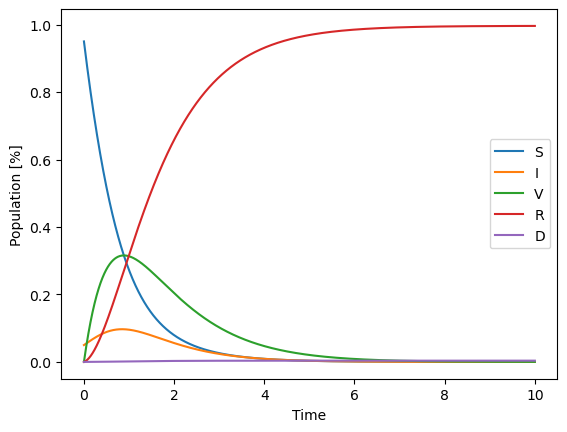

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#SIRD 3 cases of vaccines willingness
#1.1: Some time is needed to be ellapsed after a person got vaccinated
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#willingness 
#1.1: Some time is needed to be ellapsed after a person got vaccinated
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases1_willingness.png', bbox_inches='tight') #Ábra mentése

In [4]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)
#SIRD 3 cases of vaccines 
#willingness
#1.1: Some time is needed to be ellapsed after a person got vaccinated

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.0037434154792957038
Total number of infections:  0.22331166111557701
Maximum amount of infected people at the same time:  0.0969447299090699
Length of time when v_I(t)>t:  2.142999999999875


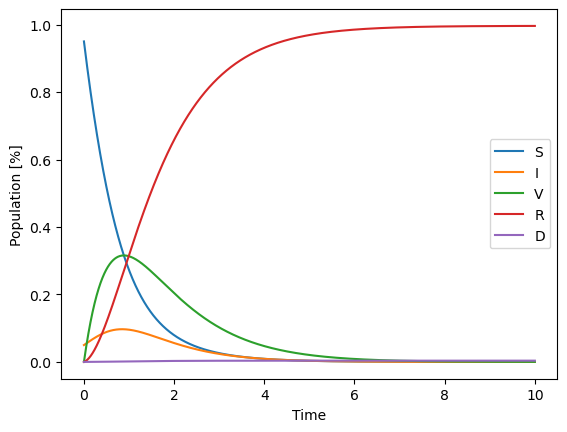

In [5]:
#SIRD 3 cases of vaccines
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated
#The "spreading" of the vaccine is defined by the capacity of it
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases1_capacity.png', bbox_inches='tight') #Ábra mentése

In [6]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)
#SIRD 3 cases of vaccines 
#capacity
#1.2: Some time is needed to be ellapsed after a person got vaccinated

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.0037434154792957038
Total number of infections:  0.22331166111557701
Maximum amount of infected people at the same time:  0.0969447299090699
Length of time when v_I(t)>t:  2.142999999999875


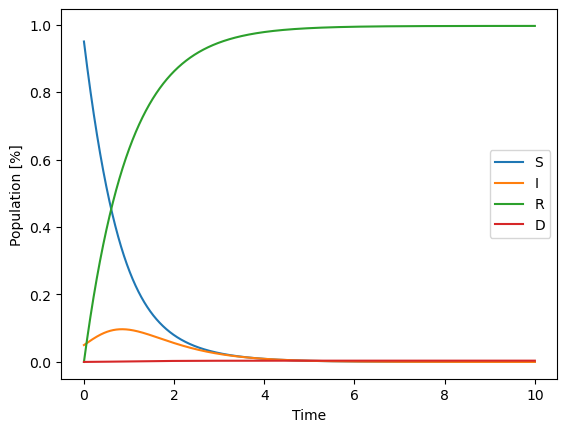

In [7]:
#SIRD 3 cases of vaccines willingness
#2.1: After vaccination, the vaccinated person get an instant protection against the virus
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05
for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + delta*v_S[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#2.1: After vaccination, the vaccinated person get an instant protection against the virus
#The "spreading" of the vaccine is defined by the willingness of the society
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases2_willingness.png', bbox_inches='tight') #Ábra mentése

In [8]:
#gained data

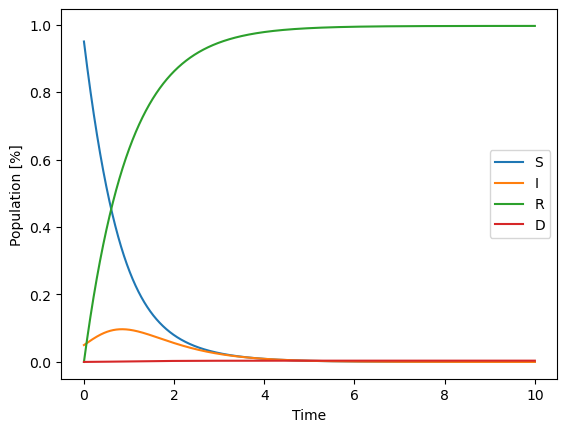

In [9]:
#SIRD 3 cases of vaccines capacity
#2.2: After vaccination, the vaccinated person get an instant protection against the virus

beta = 3
gamma = 1
delta = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + delta*v_S[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#SIRD diagram
#SIRD 3 cases of vaccines
#2.2: After vaccination, the vaccinated person get an instant protection against the virus
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases2_capacity.png', bbox_inches='tight') #Ábra mentése

In [10]:
#gained data

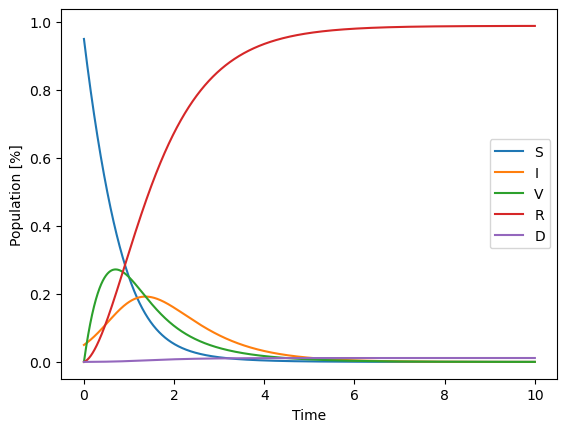

In [11]:
#SIRD 3 cases of vaccines willingness
#3.1: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
#The "spreading" of the vaccine is defined by the willingness of the society
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt + beta*v_V[t]*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt - beta*v_V[t]*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#willingness 
#1: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that periods
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases3_willingness.png', bbox_inches='tight') #Ábra mentése

In [12]:
#gained data

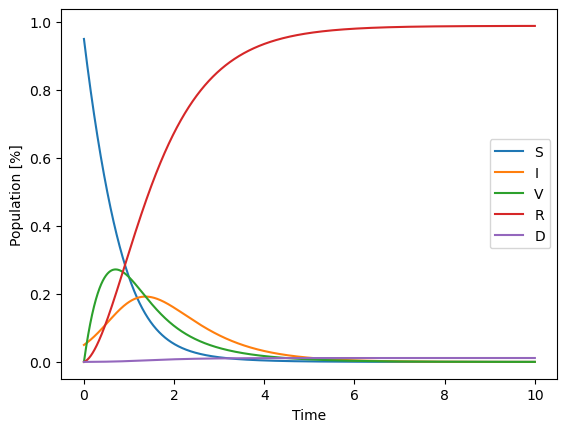

In [13]:
#SIRD 3 cases of vaccines willingness
#3.2: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
beta = 3
gamma = 1
delta = 1
epszilon = 1
mu = 0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_V=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    if v_S[t] <= 0.00:
        delta = 0
    v_S[t+1]=v_S[t] - dt*beta*v_S[t]*v_I[t] - delta*v_S[t]*dt
    v_I[t+1]=v_I[t] + dt*beta*v_S[t]*v_I[t] - gamma*v_I[t]*dt + beta*v_V[t]*v_I[t]*dt
    v_V[t+1]=v_V[t] + delta*v_S[t]*dt - epszilon*v_V[t]*dt - beta*v_V[t]*v_I[t]*dt
    v_R[t+1]=v_R[t] + (1-mu)*gamma*v_I[t]*dt + epszilon*v_V[t]*dt
    v_D[t+1]=v_D[t] + mu*gamma*v_I[t]*dt

#diagram
#SIRD 3 cases of vaccines 
#capacity
#3.2: Some time is needed to be ellapsed after a person got vaccinated and they can be injured during that period
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_V,label='V')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_Vaccine_cases3_capacity.png', bbox_inches='tight') #Ábra mentése

In [14]:
#gained data